In [ ]:
!pip install split-folders

#Midterm Project by Paul Tuccinardi

##Lung cancer CNN detection

#Data Preparation

Data: This data has 3 folders one for benign, adnocarcinoma and squamous cell carcinoma which each contain 5,000 images. Due to the large data size, the data was uploaded to my google drive to save time.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import shutil
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
adenocarcinoma_path='/content/drive/MyDrive/adenocarcinoma'
benign_path='/content/drive/MyDrive/benign'
squamous_cell_carcinoma_path='/content/drive/MyDrive/squamous_cell_carcinoma'

In [ ]:
def split_data(source_dir, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
    for label in ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']:
        files = os.listdir(os.path.join(source_dir, label))
        train_files, val_test_files = train_test_split(files, test_size=val_size + test_size)
        val_files, test_files = train_test_split(val_test_files, test_size=test_size / (val_size + test_size))

        for file in train_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(train_dir, label, file))
        for file in val_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(val_dir, label, file))
        for file in test_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(test_dir, label, file))

In [ ]:
# Create a main input directory if it doesn't exist
main_input_dir = '/content/drive/MyDrive/all_images'  # Or any suitable path
os.makedirs(main_input_dir, exist_ok=True)

# Create subdirectories for each class within the main input directory
class_dirs = ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']
for class_dir in class_dirs:
    os.makedirs(os.path.join(main_input_dir, class_dir), exist_ok=True)

# Move images into their respective class subdirectories
# Note: Replace '*.jpg' with the actual file extension of your images if it's different
for filename in os.listdir(adenocarcinoma_path):
    if filename.endswith('.jpg'):
        shutil.move(os.path.join(adenocarcinoma_path, filename),
                    os.path.join(main_input_dir, 'adenocarcinoma', filename))

for filename in os.listdir(benign_path):
    if filename.endswith('.jpg'):
        shutil.move(os.path.join(benign_path, filename),
                    os.path.join(main_input_dir, 'benign', filename))

for filename in os.listdir(squamous_cell_carcinoma_path):
    if filename.endswith('.jpg'):
        shutil.move(os.path.join(squamous_cell_carcinoma_path, filename),
                    os.path.join(main_input_dir, 'squamous_cell_carcinoma', filename))

# Now use the main_input_dir for splitting
output_dir = '/content/drive/MyDrive/split_data'
splitfolders.ratio(main_input_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)


Copying files: 15050 files [11:48, 21.25 files/s]


In [ ]:
# prompt: add labels to the images depending on what folder they are in

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import shutil
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from sklearn.model_selection import train_test_split


drive.mount('/content/drive')
adenocarcinoma_path='/content/drive/MyDrive/adenocarcinoma'
benign_path='/content/drive/MyDrive/benign'
squamous_cell_carcinoma_path='/content/drive/MyDrive/squamous_cell_carcinoma'
main_input_dir = '/content/drive/MyDrive/all_images'
def split_data(source_dir, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
    for label in ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']:
        files = os.listdir(os.path.join(source_dir, label))
        train_files, val_test_files = train_test_split(files, test_size=val_size + test_size, random_state=42) #added random state for reproducibility
        val_files, test_files = train_test_split(val_test_files, test_size=test_size / (val_size + test_size), random_state=42)

        os.makedirs(os.path.join(train_dir, label), exist_ok=True)
        os.makedirs(os.path.join(val_dir, label), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        for file in train_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(train_dir, label, file))
        for file in val_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(val_dir, label, file))
        for file in test_files:
            shutil.copy(os.path.join(source_dir, label, file), os.path.join(test_dir, label, file))

# ... (rest of your code) ...
output_dir = '/content/drive/MyDrive/split_data'
splitfolders.ratio(main_input_dir, output=output_dir, seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

# Example usage after splitting:  (Adjust paths as needed)
train_dir = '/content/drive/MyDrive/split_data/train'
val_dir = '/content/drive/MyDrive/split_data/val'

#ImageDataGenerator automatically labels based on the directory names.
train_datagen = ImageDataGenerator(rescale=1./255)  # Adjust rescale if needed
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying files: 15050 files [1:22:19,  3.05 files/s]


Found 12040 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.


In [ ]:
# prompt: Create a train test split of the data

# Example usage after splitting:  (Adjust paths as needed)
train_dir = '/content/drive/MyDrive/split_data/train'
val_dir = '/content/drive/MyDrive/split_data/val'
test_dir = '/content/drive/MyDrive/split_data/test' # Added test directory

#ImageDataGenerator automatically labels based on the directory names.
train_datagen = ImageDataGenerator(rescale=1./255)  # Adjust rescale if needed
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) # Added test datagen

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150), # Adjust target size as needed
        batch_size=32,
        class_mode='categorical') #'categorical' for multi-class

test_generator = test_datagen.flow_from_directory( # Added test generator
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Important: Do not shuffle the test data
)

Found 12040 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.
Found 1505 images belonging to 3 classes.


#Creating the CNN Model

In [ ]:
# prompt: create a cnn to classify the data into the 3 different classes
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) # 3 output units for 3 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',  # You can try other optimizers like RMSprop
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=5, # Adjust the number of epochs as needed
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc}")



Epoch 1/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 104s 267ms/step - accuracy: 0.7184 - loss: 0.5935 - val_accuracy: 0.8464 - val_loss: 0.4520
Epoch 2/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7812 - loss: 0.6466 - val_accuracy: 0.0000e+00 - val_loss: 0.8788
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


376/376 ━━━━━━━━━━━━━━━━━━━━ 142s 272ms/step - accuracy: 0.8790 - loss: 0.2994 - val_accuracy: 0.9215 - val_loss: 0.1856
Epoch 4/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 1.0000 - loss: 0.1123 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 5/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 100s 263ms/step - accuracy: 0.9253 - loss: 0.1854 - val_accuracy: 0.9195 - val_loss: 0.1900
48/48 - 10s - 211ms/step - accuracy: 0.9037 - loss: 0.2345
Test accuracy: 0.9036544561386108


#Testing model

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step


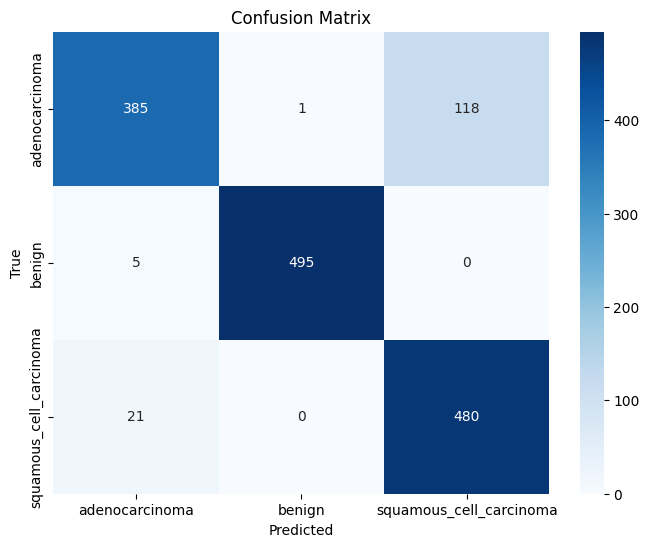

In [ ]:
# prompt: create a confusion matrix for test data using the model above

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the test generator
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Looking at the results of the confusion matrix most of the datapoints were accurately predicted. One thing to note is that there were 118 data points that were predicted as squamous_cell_carcinoma and was actually adenocarcinoma. This can be due to some cases of adenocarcinoma look very similar to what squamous_cell_carcinoma. Another reason could be that these data images provided in training for adenocarcinoma did not look like the 118 data examples that were in the test data samples. The test accuracy was 90% with train at 92% and validation at 91%